#📌 Extracão

In [80]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

with open('TelecomX_Data.json', 'r', encoding='utf-8') as f:
    dados_brutos = json.load(f)

dadosNormais = pd.json_normalize(dados_brutos)

# Contagem de nulos e duplicados
print(dadosNormais.isnull().sum())
print(dadosNormais.duplicated().sum())


customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64
0


#🔧 Transformação

In [81]:

# -----------------------------
# 1️⃣ Normalizar strings e substituir valores binários
# -----------------------------
cols_obj = dadosNormais.select_dtypes(include='object').columns

map_binario = {
    'yes': 1,
    'no': 0,
    'no phone service': 0
}

dadosNormais[cols_obj] = (
    dadosNormais[cols_obj]
    .apply(lambda x: x.str.strip().str.lower().replace(map_binario))
)


# -----------------------------
# 3️⃣ Renomear colunas
# -----------------------------
dadosNormais.rename(columns={
    'customerID': 'idcliente',
    'Churn': 'evasao',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'parceiro',
    'customer.Dependents': 'dependentes',
    'customer.tenure': 'meses_contrato',
    'phone.PhoneService': 'servico_telefone',
    'phone.MultipleLines': 'multiplas_linhas',
    'internet.InternetService': 'servico_de_internet',
    'internet.OnlineSecurity': 'antivirus',
    'internet.OnlineBackup': 'backup',
    'internet.DeviceProtection': 'protecao__de_dipositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_filmes',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod': 'metodo_pagamento',
    'account.Charges.Monthly': 'total_mensal',
    'account.Charges.Total': 'gasto_total'
}, inplace=True)
# -----------------------------
# 2️⃣ Converter colunas numéricas e tratar NaNs
# -----------------------------
numeric_cols = ['evasao', 'gasto_total', 'total_mensal']
for col in numeric_cols:
    dadosNormais[col] = pd.to_numeric(dadosNormais[col], errors='coerce')

dadosNormais.dropna(subset=['evasao', 'gasto_total'], inplace=True)

dadosNormais['evasao'] = dadosNormais['evasao'].astype(int)
dadosNormais['gasto_total'] = dadosNormais['gasto_total'].astype(float)



# -----------------------------
# 4️⃣ Padronizar gênero
# -----------------------------
dadosNormais['genero'] = dadosNormais['genero'].replace({'female': 'Mulher', 'male': 'Homem'})

# -----------------------------
# 5️⃣ Novas colunas calculadas
# -----------------------------
dadosNormais['contas_diarias'] = dadosNormais['total_mensal'] / 30

# -----------------------------
# 6️⃣ Estatísticas gerais
# -----------------------------
print(dadosNormais.describe())
print(dadosNormais.head(10))

# dados da media, mediana desvio padrão, etc
dadosNormais.describe()

/tmp/ipython-input-1199402835.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .apply(lambda x: x.str.strip().str.lower().replace(map_binario))


            evasao        idoso     parceiro  dependentes  meses_contrato  \
count  7032.000000  7032.000000  7032.000000  7032.000000     7032.000000   
mean      0.265785     0.162400     0.482509     0.298493       32.421786   
std       0.441782     0.368844     0.499729     0.457629       24.545260   
min       0.000000     0.000000     0.000000     0.000000        1.000000   
25%       0.000000     0.000000     0.000000     0.000000        9.000000   
50%       0.000000     0.000000     0.000000     0.000000       29.000000   
75%       1.000000     0.000000     1.000000     1.000000       55.000000   
max       1.000000     1.000000     1.000000     1.000000       72.000000   

       servico_telefone  multiplas_linhas  fatura_digital  total_mensal  \
count       7032.000000       7032.000000     7032.000000   7032.000000   
mean           0.903299          0.421928        0.592719     64.798208   
std            0.295571          0.493902        0.491363     30.085974   
min   

,evasao,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,fatura_digital,total_mensal,gasto_total,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


#📊 Carga e análise

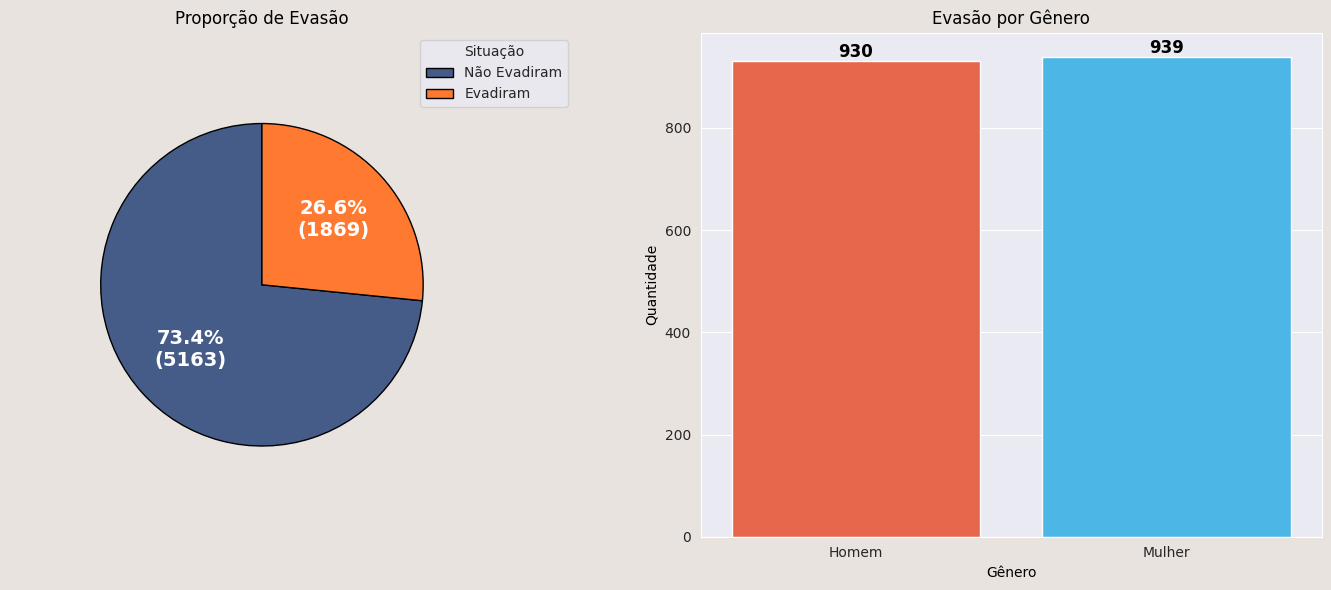

In [82]:

# ----------------------------- Configuração da figura -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor="#E9E3DF")

# ----------------------------- Pie Chart -----------------------------
todos = dadosNormais['evasao'].value_counts()
colors_pie = ["#465C88", "#FF7A30"]
legend_labels = ['Não Evadiram', 'Evadiram']


def pct_val(pct, all_vals):
    """Retorna string com % e valor absoluto para o pie chart"""
    absolute = int(round(pct / 100.0 * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

# Pie chart
wedges, texts, autotexts = axes[0].pie(
    todos,
    colors=colors_pie,
    autopct=lambda pct: pct_val(pct, todos),
    startangle=90,
    radius=0.8,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'color': "white", 'fontsize': 14, 'weight': 'bold'}
)

axes[0].legend(wedges, legend_labels, title="Situação", loc="upper left", bbox_to_anchor=(0.8, 0, 0.5, 1))
axes[0].set_title('Proporção de Evasão', color='black')

# ----------------------------- Bar Plot (Evasão por Gênero) -----------------------------
# Agrupa clientes evadidos por gênero
evasaoGenero = dadosNormais[dadosNormais['evasao'] == 1].groupby('genero').size().reset_index(name='Quantidade')

# Bar plot
sns.barplot(
    data=evasaoGenero,
    x='genero',
    y='Quantidade',
    hue='genero',       # define hue
    palette=["#FF5733", "#33C1FF"],
    ax=axes[1],
    dodge=False,
    legend=False         # evita legenda duplicada
)

# Configurações do eixo
axes[1].set_title('Evasão por Gênero', color='black')
axes[1].set_ylabel('Quantidade', color='black')
axes[1].set_xlabel('Gênero', color='black')

# Valores acima das barras
for p in axes[1].patches:
    axes[1].annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
    )

# Ajuste do layout
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

# Organizando os dados 🗂️


---




In [83]:
# ----------------------------- Consultas -----------------------------
consultas = [
    ('Clientes evadidos com parceiros', 'genero',
     (dadosNormais['evasao'] == 1) & (dadosNormais['parceiro'] == 1)),

    ('Clientes evadidos sem parceiro e sem dependentes', 'genero',
     (dadosNormais['evasao'] == 1) & (dadosNormais['dependentes'] == 0) & (dadosNormais['parceiro'] == 0)),

    ('Clientes evadidos idosos', 'genero',
     (dadosNormais['evasao'] == 1) & (dadosNormais['idoso'] == 1)),

    ('Clientes evadidos com dependentes', 'genero',
     (dadosNormais['evasao'] == 1) & (dadosNormais['dependentes'] == 1)),

    ('Clientes evadidos idosos com parceiro', 'genero',
     (dadosNormais['evasao'] == 1) & (dadosNormais['idoso'] == 1) & (dadosNormais['parceiro'] == 1))
]

# ----------------------------- Processamento -----------------------------
# Criar DataFrame longo diretamente, sem lista intermediária
df_long = pd.concat([
    dadosNormais[filtro].groupby(agrupamento).size().reset_index(name='Contagem')
    .assign(Descrição=descricao, Agrupamento=agrupamento)
    for descricao, agrupamento, filtro in consultas
], ignore_index=True)

# Reordenar colunas para manter consistência
df_long = df_long[['Descrição', 'Agrupamento', 'genero', 'Contagem']]


# Exibir resultado
df_long


,Descrição,Agrupamento,genero,Contagem
0,Clientes evadidos com parceiros,genero,Homem,350
1,Clientes evadidos com parceiros,genero,Mulher,319
2,Clientes evadidos sem parceiro e sem dependentes,genero,Homem,536
3,Clientes evadidos sem parceiro e sem dependentes,genero,Mulher,587
4,Clientes evadidos idosos,genero,Homem,236
5,Clientes evadidos idosos,genero,Mulher,240
6,Clientes evadidos com dependentes,genero,Homem,161
7,Clientes evadidos com dependentes,genero,Mulher,165
8,Clientes evadidos idosos com parceiro,genero,Homem,117
9,Clientes evadidos idosos com parceiro,genero,Mulher,81


In [85]:
# ----------------------------- Evasão por Tipo de Contrato -----------------------------
# Filtra apenas clientes evadidos
evasao = dadosNormais[dadosNormais['evasao'] == 1]

# Agrupa por tipo de contrato e calcula a porcentagem
evasaoContratoPorcentagem = (evasao.groupby('tipo_contrato').size() / len(evasao)) * 100
print("Evasão por Tipo de Contrato (Percentagem dos Clientes Evadidos):")
print(evasaoContratoPorcentagem)

# ----------------------------- Evasão por Método de Pagamento -----------------------------
# Agrupa por método de pagamento e calcula porcentagem
evasaoMetodoPagamentoPercentagem = (evasao.groupby('metodo_pagamento').size() / len(evasao)) * 100
print("\nEvasão por Método de Pagamento:")
print(evasaoMetodoPagamentoPercentagem)

# ----------------------------- Evasão por Serviço de Internet -----------------------------
# Agrupa por serviço de internet e calcula porcentagem
evasaoServicoInternetPercentagem = (evasao.groupby('servico_de_internet').size() / len(evasao)) * 100
print("\nEvasão por Serviços de Internet:")
print(evasaoServicoInternetPercentagem)

# ----------------------------- Matriz de Correlação -----------------------------
# Seleciona colunas de interesse para correlação
colunas_interesse = ['dependentes', 'parceiro', 'evasao', 'idoso', 'servico_telefone', 'gasto_total']

# Calcula a matriz de correlação
matriz_correlacao = dadosNormais[colunas_interesse].corr()
print("\nMatriz de Correlação:")
print(matriz_correlacao)

# Extraindo correlação específica com evasão
for col in ['dependentes', 'parceiro', 'idoso', 'servico_telefone']:
    print(f"Correlação entre {col.capitalize()} e Evasão: {matriz_correlacao.loc[col, 'evasao']}")

# ----------------------------- Evasão por Trimestre de Contrato -----------------------------
# Define bins de 3 meses e labels de trimestres
bins = list(range(0, 73, 3)) + [float('inf')]  # 0,3,6,...72,inf
labels = [f'{i+1}º Trimestre' for i in range(len(bins)-1)]

# Cria coluna categórica de trimestres
dadosNormais['meses_contrato_trimestre'] = pd.cut(
    dadosNormais['meses_contrato'],
    bins=bins,
    labels=labels,
    right=False
)

# Agrupa apenas clientes evadidos por trimestre
evasao_por_trimestre = evasao.groupby('meses_contrato_trimestre', observed=False).size()

print("\n Evasão por Trimestre de Meses de Contrato:")
print(evasao_por_trimestre)


Evasão por Tipo de Contrato (Percentagem dos Clientes Evadidos):
tipo_contrato
month-to-month    88.550027
one year           8.881755
two year           2.568218
dtype: float64

Evasão por Método de Pagamento:
metodo_pagamento
bank transfer (automatic)    13.804173
credit card (automatic)      12.413055
electronic check             57.303371
mailed check                 16.479401
dtype: float64

Evasão por Serviços de Internet:
servico_de_internet
0               6.046014
dsl            24.558587
fiber optic    69.395399
dtype: float64

Matriz de Correlação:
                  dependentes  parceiro    evasao     idoso  servico_telefone  \
dependentes          1.000000  0.452269 -0.163128 -0.210550         -0.001078   
parceiro             0.452269  1.000000 -0.149982  0.016957          0.018397   
evasao              -0.163128 -0.149982  1.000000  0.150541          0.011691   
idoso               -0.210550  0.016957  0.150541  1.000000          0.008392   
servico_telefone    -0.001078

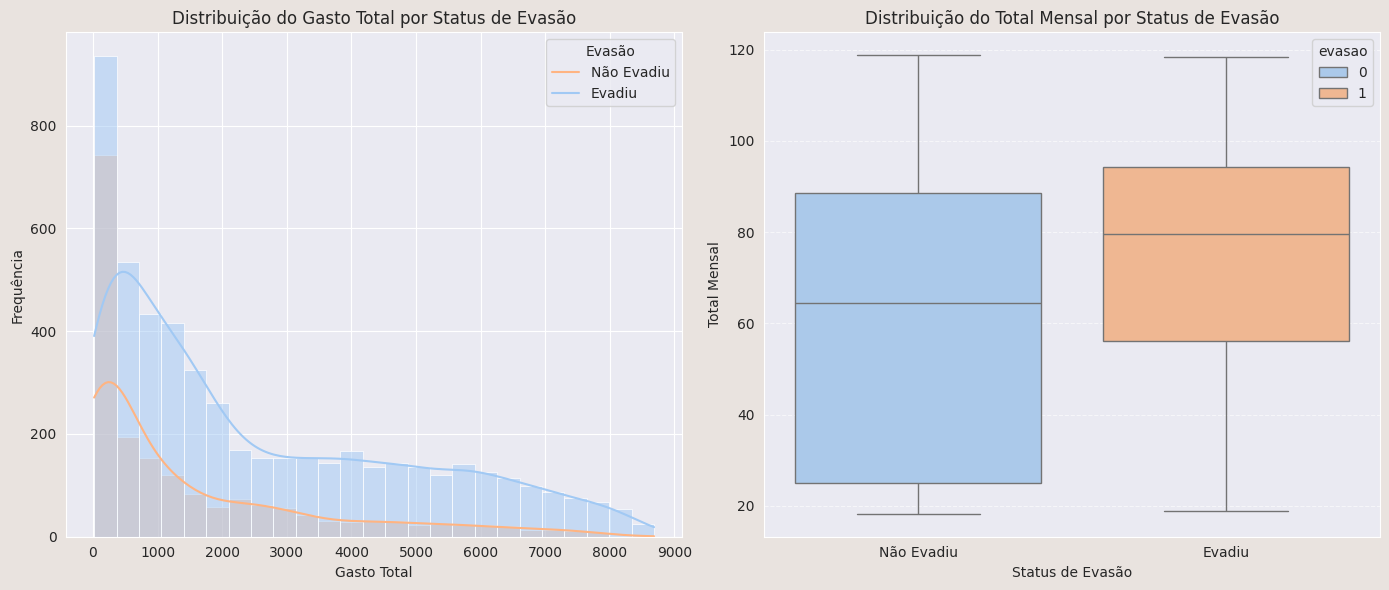

In [86]:
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')  # Define estilo geral dos gráficos

# ----------------------------- Criação da Figura -----------------------------
# Criar figura com 1 linha e 2 colunas de subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor="#E9E3DF")

# ----------------------------- Primeiro Gráfico: Histograma -----------------------------
# Histograma do gasto_total por evasão
sns.histplot(
    data=dadosNormais,
    x='gasto_total',
    hue='evasao',          # Colore por status de evasão
    kde=True,              # Adiciona curva de densidade
    palette="pastel",
    edgecolor="white",
    linewidth=0.5,
    ax=axes[0]
)

# Títulos e labels
axes[0].set_title('Distribuição do Gasto Total por Status de Evasão')
axes[0].set_xlabel('Gasto Total')
axes[0].set_ylabel('Frequência')

# Controla quantidade de ticks no eixo X para melhor visualização
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# Ajusta legenda para nomes mais claros
axes[0].legend(title='Evasão', labels=['Não Evadiu', 'Evadiu'])

# ----------------------------- Segundo Gráfico: Boxplot -----------------------------
# Boxplot do total_mensal por status de evasão
sns.boxplot(
    data=dadosNormais,
    x='evasao',
    y='total_mensal',
    hue='evasao',
    palette="pastel",
    dodge=False,           # Evita duplicar cores desnecessariamente
    ax=axes[1]
)

# Títulos e labels
axes[1].set_title('Distribuição do Total Mensal por Status de Evasão')
axes[1].set_xlabel('Status de Evasão')
axes[1].set_ylabel('Total Mensal')

# Ajuste de labels do eixo X
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Não Evadiu', 'Evadiu'])


# Adiciona grid horizontal para facilitar leitura
axes[1].grid(True, linestyle='--', alpha=0.6, axis='y')


# ----------------------------- Ajuste Final -----------------------------
plt.tight_layout()  # Ajusta espaçamento automático
plt.show()


# Evasão por Trismestre 📈

---



In [ ]:
# Criar figura e ajustar tamanho
plt.figure(figsize=(17, 6))

# Criar o gráfico de barras
plt.bar(evasao_por_trimestre.index, evasao_por_trimestre.values)

# Personalizar
plt.title("Evasão por Trimestre de Meses de Contrato")
plt.xticks(rotation=90)
plt.xlabel("Trimestre de Meses de Contrato")
plt.ylabel("Quantidade de Evasões")

plt.show()

# Correlação de dados e outras análises gráficas 📊


---



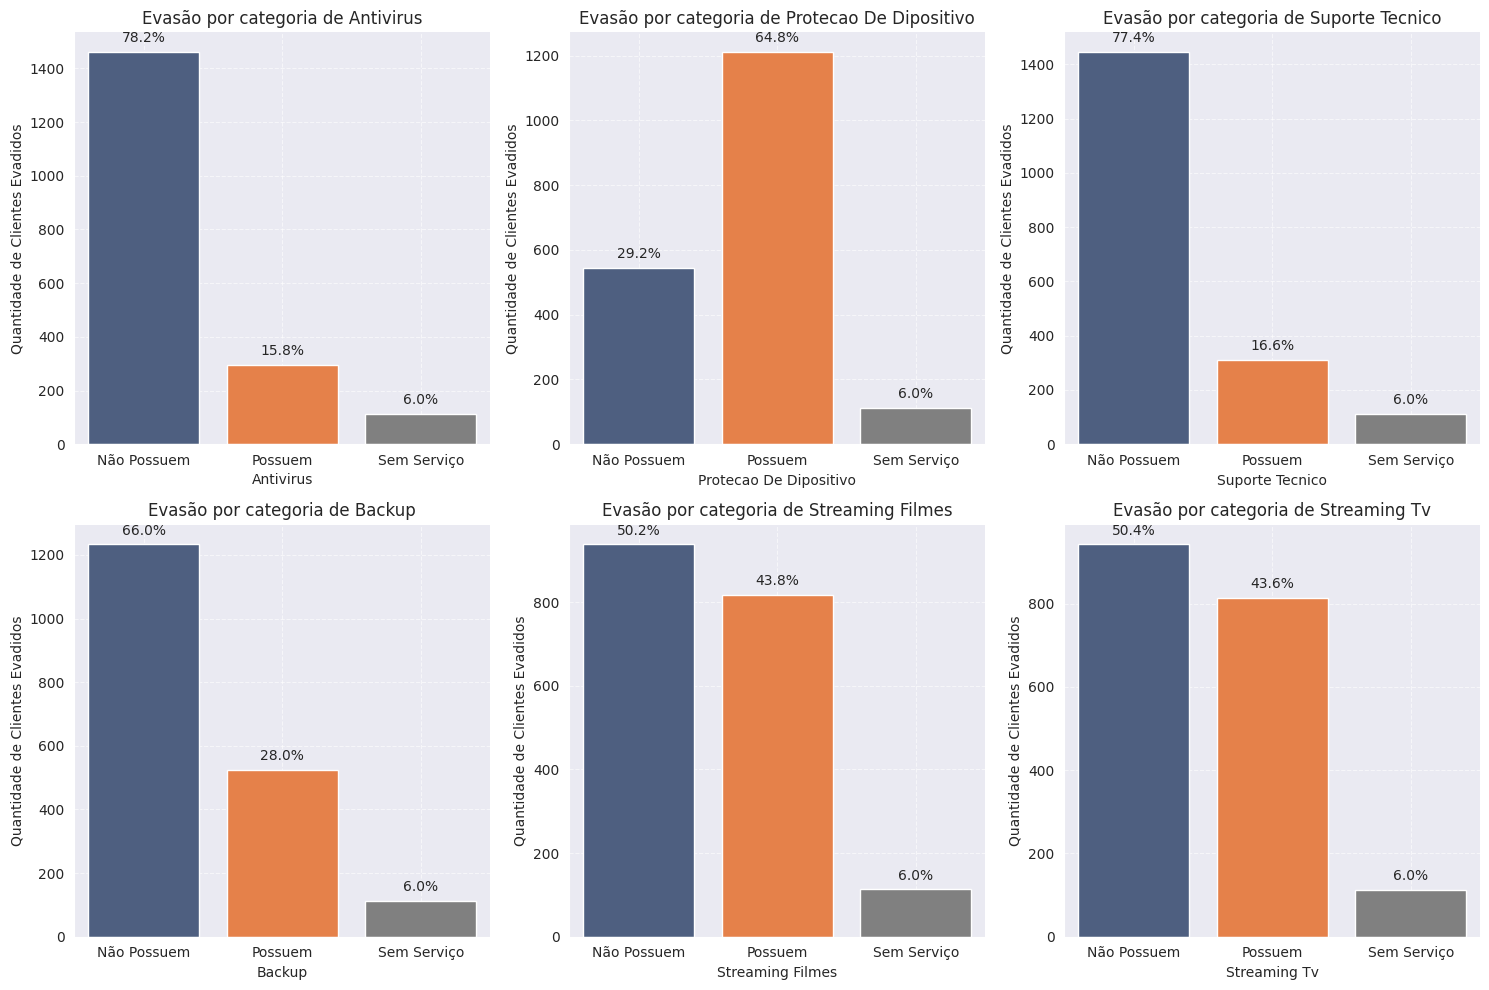

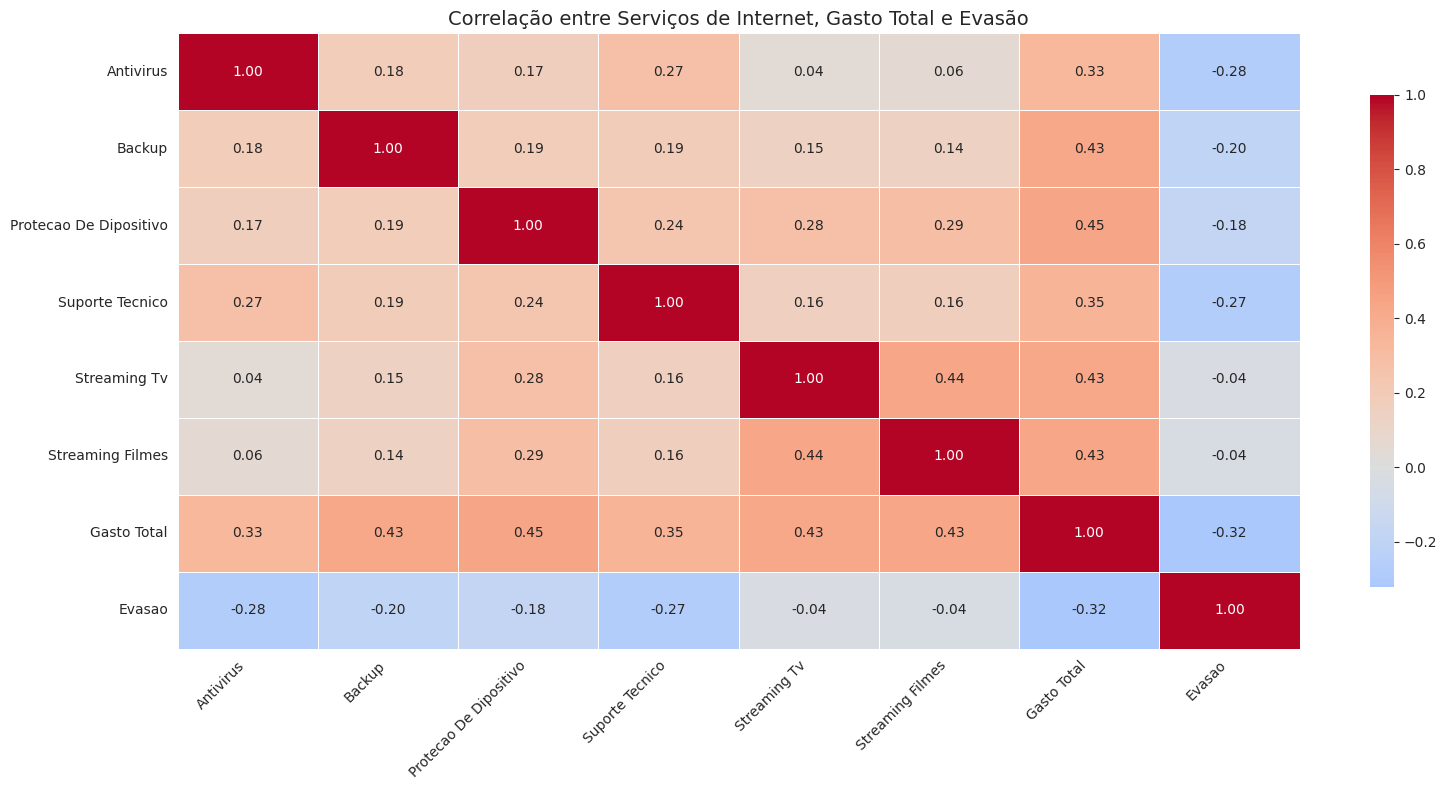

In [107]:

# ----------------------------- Inicialização -----------------------------
servicosInternet = [
    'antivirus',
    'protecao__de_dipositivo',
    'suporte_tecnico',
    'backup',
    'streaming_filmes',
    'streaming_tv'
]
# Filtrar apenas clientes evadidos
dadosEvasao = dadosNormais[dadosNormais['evasao'] == 1]
totalEvasao = len(dadosEvasao)

dadosEvasao.loc[:, 'servico_de_internet'] = dadosEvasao['servico_de_internet'].replace({
    0: 'Sem Serviço',
    'dsl': 'DSL',
    'fiber optic': 'Fibra Óptica'
})


# Map para labels legíveis
labels_map = {
    0: 'Não Possuem',
    1: 'Possuem',
    'dsl': 'DSL',
    'fiber optic': 'Fibra Óptica',
    'no internet service': 'Sem Serviço'
}


# Função para formatar nomes (remover '_' e '__' e colocar title)
def formatar_nome(nome):
    return nome.replace('__', ' ').replace('_', ' ').title()

# ----------------------------- Função para plotar contagem -----------------------------
def verEvasao(dadosEvasao, servicosInternet):
    n = len(servicosInternet)
    ncols = 3  # máximo de colunas por linha
    nrows = math.ceil(n / ncols)

    # Criar figura com múltiplos subplots
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
    axs = axs.flatten() if n > 1 else [axs]
    totalEvasao = len(dadosEvasao)

    for ax, servico in zip(axs, servicosInternet):
        # Plot countplot
        sns.countplot(
            data=dadosEvasao,
            x=servico,
            hue=servico,  # redundante se dodge=False
            palette=["#465C88", "#FF7A30", "grey"],
            ax=ax,
            legend=False
        )

        # Títulos e labels legíveis
        titulo_legivel = servico.replace("__", " ").replace("_", " ").title()
        ax.set_title(f'Evasão por categoria de {titulo_legivel}')
        ax.set_xlabel(titulo_legivel)
        ax.set_ylabel('Quantidade de Clientes Evadidos')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.grid(True, linestyle='--', alpha=0.6)

        # Adiciona porcentagens em cada barra
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                percentage = (height / totalEvasao) * 100
                ax.annotate(
                    f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 5),
                    textcoords='offset points'
                )

        # Ajusta os labels do eixo X para valores legíveis
        categorias = sorted([c for c in dadosEvasao[servico].dropna().unique() if isinstance(c, int)])
        categorias += [c for c in dadosEvasao[servico].dropna().unique() if not isinstance(c, int)]
        ax.set_xticks(range(len(categorias)))
        ax.set_xticklabels([labels_map.get(c, str(c)) for c in categorias])

    # Remove eixos extras se houver
    for ax in axs[n:]:
        ax.remove()

    plt.tight_layout()
    plt.show()

verEvasao(dadosEvasao, servicosInternet)
print()

# ----------------------------- Heatmap de correlação -----------------------------

def verHeatmap():
  dadosInternet = dadosNormais[dadosNormais['servico_de_internet'] != 0].copy()
  colunasInternet = ['antivirus', 'backup', 'protecao__de_dipositivo',
                    'suporte_tecnico', 'streaming_tv', 'streaming_filmes']

  # Garantir que as colunas sejam numéricas
  dadosInternet[colunasInternet + ['gasto_total', 'evasao']] = dadosInternet[colunasInternet + ['gasto_total', 'evasao']].apply(pd.to_numeric, errors='coerce')

  # Calcular matriz de correlação
  correlacao = dadosInternet[colunasInternet + ['gasto_total', 'evasao']].corr()

  # Ajustar nomes das colunas e índice
  colunas_legiveis = [formatar_nome(c) for c in correlacao.columns]
  correlacao.columns = colunas_legiveis
  correlacao.index = colunas_legiveis

  # Plotar heatmap
  fig, ax = plt.subplots(figsize=(16, 8))
  sns.heatmap(
      correlacao,
      annot=True,
      fmt=".2f",
      cmap="coolwarm",
      center=0,
      linewidths=0.5,
      cbar_kws={"shrink": 0.8},
      ax=ax
  )
  plt.xticks(rotation=45, ha='right')
  plt.yticks(rotation=0)
  ax.set_title("Correlação entre Serviços de Internet, Gasto Total e Evasão", fontsize=14)
  plt.tight_layout()
  plt.show()


# Chamada da função
verHeatmap()

#📄Relatorio Final

# 📊 Análise de Evasão de Clientes (Churn) na TelecomX

---

## 📌 Introdução
O objetivo desta análise é identificar e compreender os principais fatores que influenciam a evasão de clientes (*churn*) na TelecomX.  
O churn representa a saída voluntária de clientes de uma empresa, o que impacta diretamente a receita e a sustentabilidade do negócio.  
Ao analisar padrões e correlações nos dados, é possível encontrar indícios sobre os motivos da evasão e criar estratégias de retenção mais eficazes.

---

## 🛠 Limpeza e Tratamento de Dados
O processo de preparação dos dados seguiu as seguintes etapas:  
1. **Importação** do arquivo JSON contendo os registros de clientes e conversão para um *DataFrame* do Pandas.  
2. **Padronização de nomes** de colunas para o idioma português.  
3. **Conversão de variáveis categóricas** para valores numéricos (0 e 1) em respostas como “Sim” e “Não”.  
4. **Tratamento de valores ausentes** nas colunas críticas, como *evasão* e *gasto total*.  
5. **Verificação de coerência** entre variáveis (por exemplo, se o cliente não possui serviço de internet, as colunas de serviços adicionais foram ajustadas).  

---

## 🔍 Análise Exploratória de Dados
A análise exploratória envolveu:  
- Distribuição da variável alvo (*evasão*) e proporção de clientes que cancelaram.  
- Relação entre evasão e variáveis categóricas: gênero, parceiro, dependentes, idade, tipo de contrato, método de pagamento, serviço de internet e serviços adicionais.  
- Relação entre evasão e variáveis numéricas: meses de contrato, valor mensal e gasto total, incluindo análise por trimestres de permanência.  
- **Matriz de correlação** para clientes com serviço de internet, destacando associações entre serviços adicionais, gasto total e evasão.  
- Visualizações como pie charts, histogramas, boxplots e heatmaps para facilitar a interpretação dos padrões.


---

## 📈 Principais Insights
- A taxa total de evasão é de **26,6%**.  
- **Contratos mensais** apresentam maior risco de evasão comparado a contratos de longo prazo.  
- **Pagamento por cheque eletrônico** está associado a uma taxa mais alta de cancelamento.  
- Clientes com **internet por fibra óptica** apresentam maior evasão do que outros tipos de conexão.  
- A evasão ocorre principalmente nos **primeiros meses de contrato**.  
- **Contas mensais mais altas** aumentam a probabilidade de cancelamento.  
- **Serviços adicionais de internet** — como Backup Online, Proteção de Dispositivo, Antivírus, Suporte Técnico, Streaming de TV e Streaming de Filmes apresentam correlação positiva com evasão, sugerindo que clientes que contratam múltiplos serviços têm maior risco de cancelar.


---
## 💡 Recomendações

* **Criar programas de engajamento e suporte nos primeiros meses de contrato**, pois a evasão é mais intensa no início.

* **Incentivar a adesão a contratos mais longos**, reduzindo a rotatividade e aumentando a fidelidade dos clientes.

* **Analisar e melhorar o processo de pagamento por cheque eletrônico**, identificado como fator de risco para cancelamento.

* **Avaliar a experiência de clientes com internet por fibra óptica**, investigando problemas que possam gerar insatisfação.

* **Monitorar e otimizar serviços adicionais** como **Backup Online, Proteção de Dispositivo, Antivírus e Suporte Técnico**, pois a análise mostrou correlação positiva com evasão (ou seja, clientes que contratam esses serviços apresentam maior risco de cancelamento); pode ser necessário revisar valor percebido, custo-benefício ou comunicação desses serviços.

* **Oferecer pacotes personalizados ou descontos** para clientes com contas mais altas e serviços adicionais, aumentando a percepção de valor e retenção.


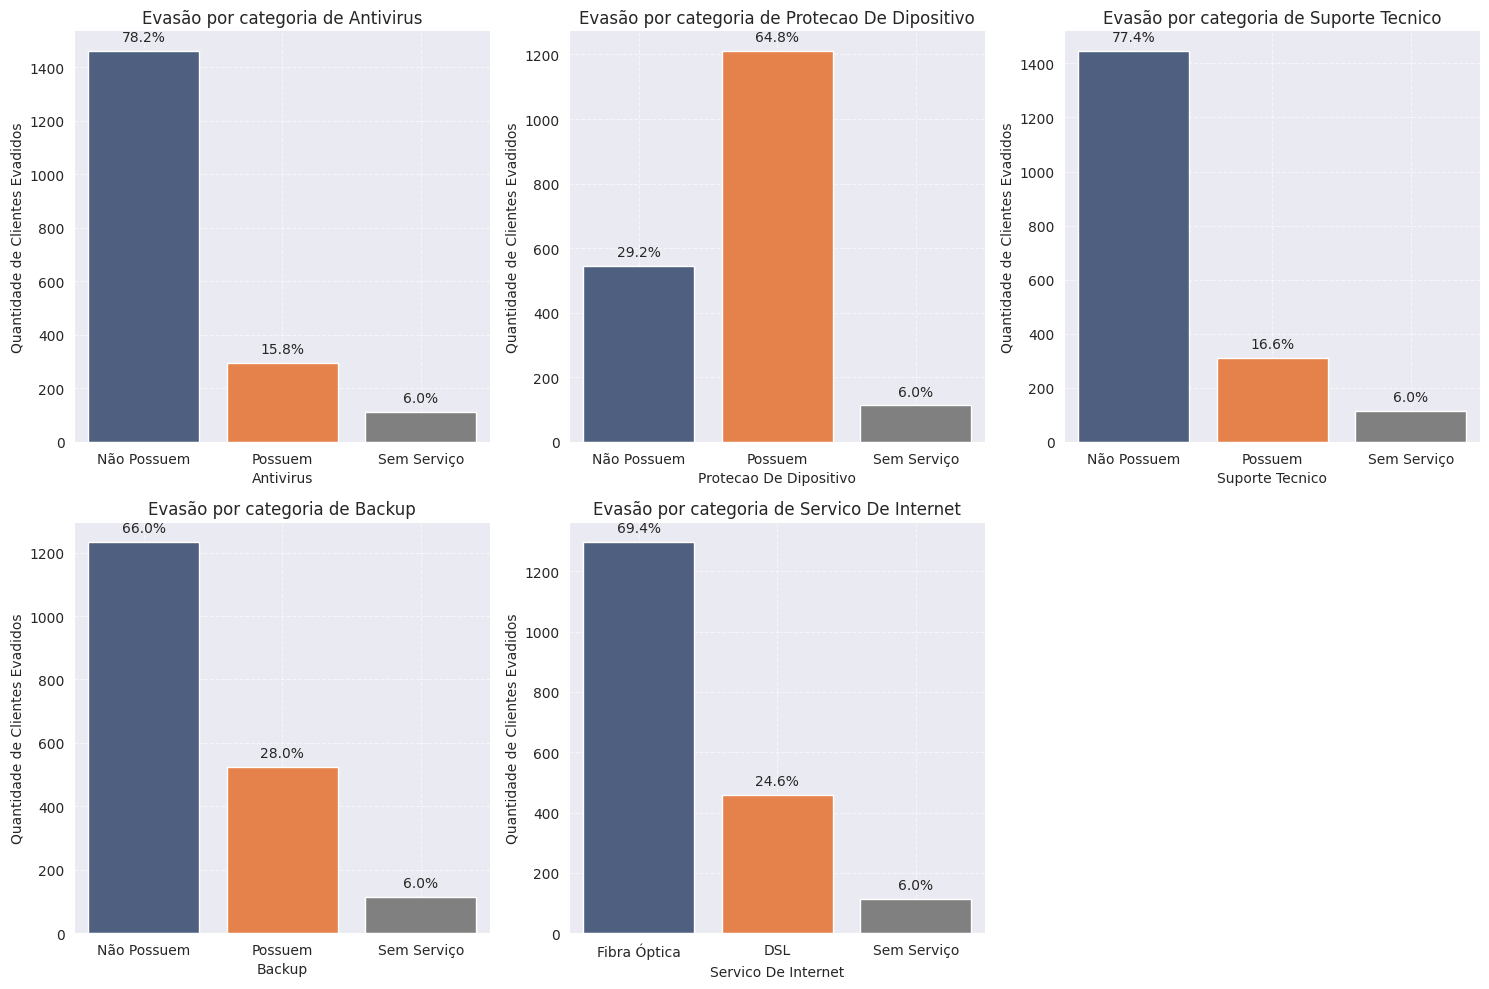

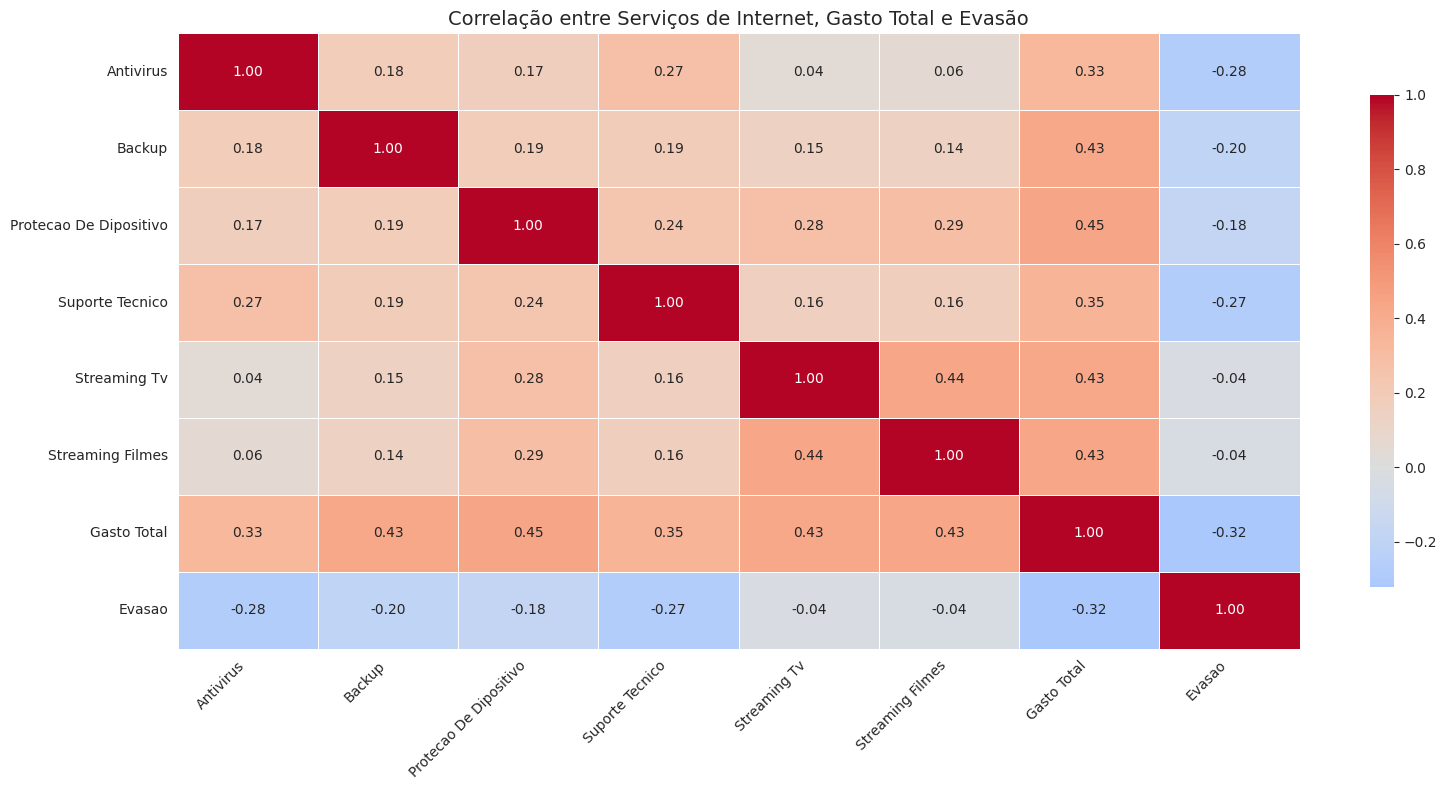

In [108]:
# Definindo os filtros
servicosInternet = [
    'antivirus',
    'protecao__de_dipositivo',
    'suporte_tecnico',
    'backup',
    'servico_de_internet'

]
# Chamando pela função de Gráficos de evasão
verEvasao(dadosEvasao,servicosInternet)

print()

# Chamando pela função do heatmap
verHeatmap()